Question 1: What is the difference between standard deviation and the standard error from the mean?

As covered in our tutorial, while standard deviation and standard error covers relatively similar concepts, they are still fundamentally different methods of interpreting data. To begin, standard deviation is used to determine and display the amount of variance within a dataset. It represents the amount of typical distance data points have from the mean in that particular dataset. 
Standard error from the mean on the another hand focuses on the variance of the sample mean with any given population. For example {1,2,3,4,5,6} could be our population. A sample would randomly take specific values from that population. From that we could determine the mean, giving us a sample mean. Now imagine that we took a random sample 1000 times and determined the sample mean for each of them. The standard error from the mean focuses on the variance of the sample means from those 1000 samples. This is important, because while both standard deviation and standard error from the mean both focus on aspects related to variance, standard deviation prioritizes a singular sample/dataset, while the standard error from the mean focuses a wide variety of samples all coming from a singular 

Question 2:

Question 3:

Question 4:

Question 5:

Question 6:

What is the process of bootstrapping?
First off, think of any given finite set of data. 

The core of the process of bootstrapping involves taking any finite set of data, and taking a large number of samples of that data in order to create a new set of data that represents the average sample mean. That was a lot in one sentence for a beginner, so let me break it down. First, we need to start with a set of data, typically gotten from some sort of experiment. Now that we have this set of data, we want to know whether the mean of our data is an accurate representation of the data, and more importantly, what sort of variance may we have with the mean if this experiment was re-done. So next, we randomly take data-points from our dataset to create a new sample, this process is called sampling with replacement. Now that we have a new sample of data, we determine the mean. Now we done this over and over again, this could be 100 more times, or it could be 100000 times. After that, we can create a histogram of all of the means and figure out what this dataset represents and what we can gather from it, one thing for example is the standard error from the mean. 


What is the main purpose of bootstrapping?
Let me first start with an example. Imagine I wanted to figure out what is the probability of flipping a heads, and what is the probability of flipping a tails purely based off of experimental values. Well the clear way to do that is to flip a coin, and record your results. Intuitively, we know it should come out to 50%. However, first imagine that I flipped the coin 10 times, and got 7 heads and 3 tails. From these results alone, I would conclude that there is a 70% chance to get a heads and a 30% chance to get a tails. Obviously, we know that isn't true, so in order to achieve an accurate result, we would need to repeat the experiment over and over again. This would be incredibly time consuming, and furthermore, some other experiments can be quite expensive, making this a very inefficient method of collecting accurate data. Hence, the purpose of bootstrapping comes into play, as it provides a significantly improved method of gathering results that represent the typical mean of a certain population. 

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
If you have some sort of sample of size n from a population, that sample could be used to create a histogram of sample means using bootstrapping. Once you have that, you could take the confidence interval of the histogram. This confidence interval would provide valuable insight as whether your hypothesized guess is plausible, as if your guess is within the confidence interval, it would be plausible, however if it's not within the confidence interval, the guess can be disregarded as it's likely not accurate. 

Question 7: Since the confidence interval 

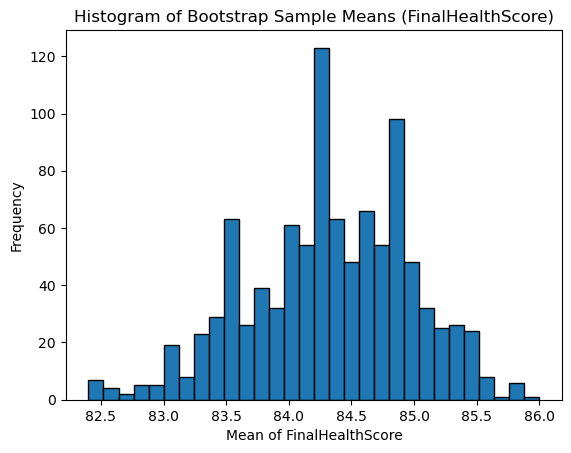

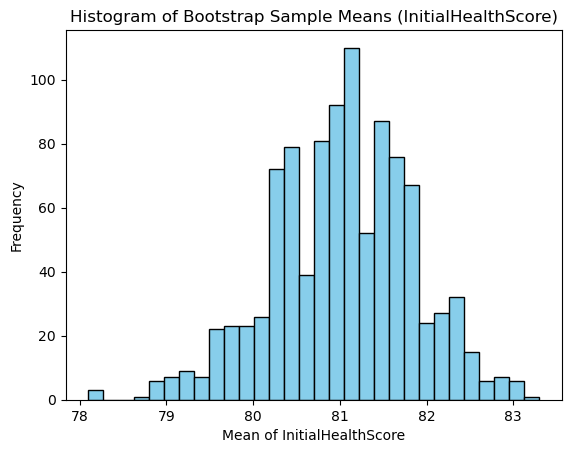

{'Final Health Score': {'Mean': 84.31819999999998,
  'Standard Deviation': 0.6408739965699026,
  '95% CI': (83.0, 85.4)},
 'Initial Health Score': {'Mean': 81.0273,
  'Standard Deviation': 0.8179937798197636,
  '95% CI': (79.3, 82.6)}}

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data dictionary
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set the random seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
n_iterations = 1000

# Store means of bootstrap samples
bootstrap_means = []

# Perform bootstrapping
for _ in range(n_iterations):
    # Resample with replacement
    sample = df.sample(n=len(df), replace=True)
    # Calculate the mean of the FinalHealthScore column
    sample_mean = sample['FinalHealthScore'].mean()
    bootstrap_means.append(sample_mean)

# Plot histogram of bootstrap means
plt.hist(bootstrap_means, bins=30, edgecolor='black')
plt.title('Histogram of Bootstrap Sample Means (FinalHealthScore)')
plt.xlabel('Mean of FinalHealthScore')
plt.ylabel('Frequency')
plt.show()

# Store means of bootstrap samples for InitialHealthScore
bootstrap_initial_means = []

# Perform bootstrapping for InitialHealthScore
for _ in range(n_iterations):
    # Resample with replacement
    sample = df.sample(n=len(df), replace=True)
    # Calculate the mean of the InitialHealthScore column
    sample_mean = sample['InitialHealthScore'].mean()
    bootstrap_initial_means.append(sample_mean)

# Plot histogram of bootstrap means for InitialHealthScore
plt.hist(bootstrap_initial_means, bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of Bootstrap Sample Means (InitialHealthScore)')
plt.xlabel('Mean of InitialHealthScore')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean, standard deviation, and 95% confidence interval for both Initial and Final Health Scores

def bootstrap_confidence_interval(data, confidence=0.95):
    lower_percentile = (1 - confidence) / 2
    upper_percentile = 1 - lower_percentile
    lower_ci = np.percentile(data, lower_percentile * 100)
    upper_ci = np.percentile(data, upper_percentile * 100)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    
    return mean, std, lower_ci, upper_ci

# Calculate for FinalHealthScore using bootstrap
final_mean, final_std, final_lower_ci, final_upper_ci = bootstrap_confidence_interval(bootstrap_means)

# Calculate for InitialHealthScore using bootstrap
initial_mean, initial_std, initial_lower_ci, initial_upper_ci = bootstrap_confidence_interval(bootstrap_initial_means)

{
    "Final Health Score": {
        "Mean": final_mean,
        "Standard Deviation": final_std,
        "95% CI": (final_lower_ci, final_upper_ci)
    },
    "Initial Health Score": {
        "Mean": initial_mean,
        "Standard Deviation": initial_std,
        "95% CI": (initial_lower_ci, initial_upper_ci)
    }
}

Question 8 Report:

Problem Introduction:
To begin, there will first be an explanation of the Null Hypothesis. The Null Hypothesis is a general term for the possibility of a certain relationship having no meaningful effect on each other. In this case, the Null Hypothesis would be that the vaccine has no meaningful effect on the patient's health. The hypothesis does not imply that every patient will have 0 change in their health, rather that the confidence interval of means of the initial health score and the final health score contain the same score. 

As we can see above, I used bootstrapping to determine whether or not the vaccine has a meaningful effect on a patient's health. The purpose of the method is to use a limited set of a data and re-use it over and over to gather a large number of sample means. This allows us to have the same effect of doing the experiment over and over, but without any of the time/cost. From the data, we can see that the confidence interval for the final health score ranges from 83 to 85.4. On the other hand, the initial health score ranges from 79.3 to 82.6. Furthermore, the final health score has an average sample mean of 84.3, while the initial health score has an average sample mean of a 81.0

From these values, we can disregard the null hypothesis as the confidence interval of the finial health score and the initial health score are disjoint. Meaning that while there could be cases where there isn't a noticeable difference in any given patient's health, these are quite rare and can be disregarded. 

Hence we can conclude that the vaccine is effective. 

Question 9: